In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime


In [2]:
df= pd.read_excel('C:/Users/User/Documents/INTERNSHIP/eda data/mass/Antartica_mass.xlsx')

In [3]:
print(df.head(5))

      year  Antarctic mass  Antarctic mass 1-sigma uncertainty
0  2002.29            0.00                              178.90
1  2002.35           23.70                              102.47
2  2002.62          -51.67                               83.09
3  2002.71           47.89                               97.19
4  2002.79           72.21                               61.82


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 3 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   year                                213 non-null    float64
 1   Antarctic mass                      213 non-null    float64
 2   Antarctic mass 1-sigma uncertainty  213 non-null    float64
dtypes: float64(3)
memory usage: 5.1 KB
None


In [5]:
print(df.describe())

              year  Antarctic mass  Antarctic mass 1-sigma uncertainty
count   213.000000      213.000000                          213.000000
mean   2012.137559    -1143.934930                           38.718685
std       6.058245      894.473385                           14.389392
min    2002.290000    -3029.880000                           26.710000
25%    2006.960000    -1902.300000                           33.140000
50%    2011.540000     -938.210000                           36.860000
75%    2017.250000     -324.030000                           39.990000
max    2022.710000       72.210000                          178.900000


In [6]:
print(df.columns)

Index(['year', 'Antarctic mass', 'Antarctic mass 1-sigma uncertainty'], dtype='object')


In [7]:
print(df.dtypes)

year                                  float64
Antarctic mass                        float64
Antarctic mass 1-sigma uncertainty    float64
dtype: object


In [8]:
print(df.isnull().sum())

year                                  0
Antarctic mass                        0
Antarctic mass 1-sigma uncertainty    0
dtype: int64


In [9]:
print(df.isna().sum())

year                                  0
Antarctic mass                        0
Antarctic mass 1-sigma uncertainty    0
dtype: int64


In [10]:
print(df.shape)

(213, 3)


In [11]:
df['year'] = df['year'].apply(lambda x: datetime(int(x), 1, 1) + pd.DateOffset(days=int((x % 1) * 365)))


In [12]:
years = df['year']
antarctic_mass = df['Antarctic mass']
uncertainty = df['Antarctic mass 1-sigma uncertainty']

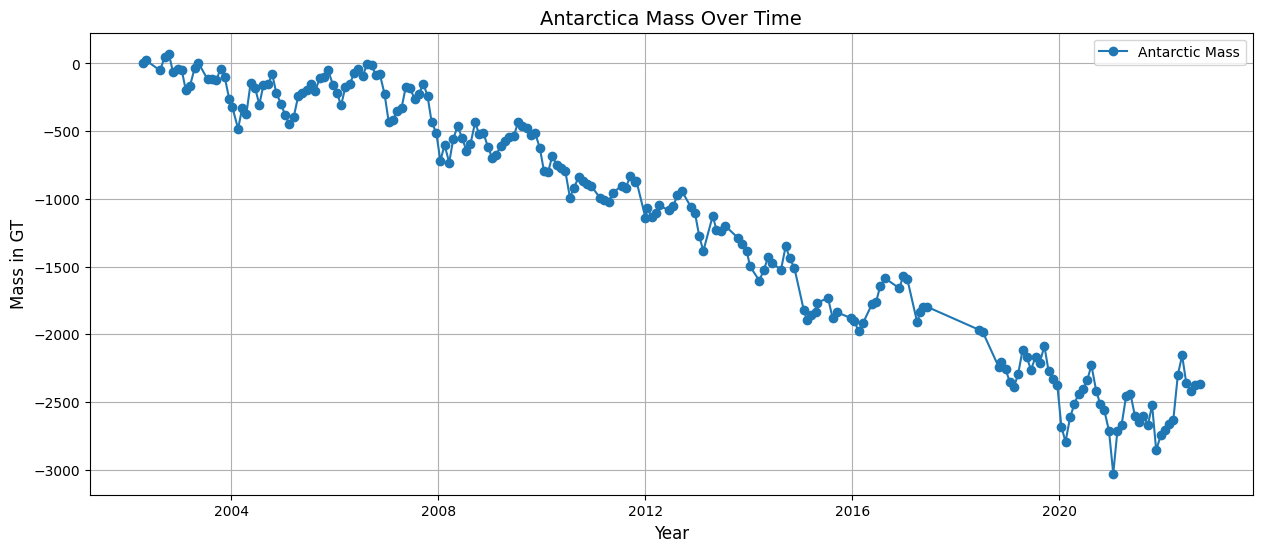

In [13]:
plt.figure(figsize=(15, 6))
plt.plot(years, antarctic_mass, marker='o', linestyle='-', label='Antarctic Mass')

plt.xlabel('Year', fontsize=12)
plt.ylabel('Mass in GT', fontsize=12)
plt.title('Antarctica Mass Over Time', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

<h3>Summary</h3>
<p>From 2002 to 2022, there has been a significant decrease in the mass of ice worldwide, primarily attributed to the effects of climate change.This ice mass loss is particularly evident in regions such as Antarctica and Greenland.</p>

In [25]:
for row in df:
    try:
        years.append(row[0])
        antarctic_mass.append(float(row[1]))
    except (ValueError, TypeError) as e:
        print(f"Error converting '{row[1]}' to float in row {row}: {e}")

# Ensure the dataset has at least two points for comparison
if len(antarctic_mass) >= 2:
    # Calculate percentage change between consecutive years
    percentage_change = np.diff(antarctic_mass) / antarctic_mass[:-1] * 100

    # Display whether it's an increase or decrease
    for year, percentage in zip(years[1:], percentage_change):
        if percentage > 0:
            print(f'Year {year}: Percentage Increase = {percentage:.2f}% (Increase)')
        elif percentage < 0:
            print(f'Year {year}: Percentage Decrease = {abs(percentage):.2f}% (Decrease)')
        else:
            print(f'Year {year}: No Change')
else:
    print("Error: Insufficient data points for comparison.")

Error converting 'e' to float in row year: could not convert string to float: 'e'
Error converting 'n' to float in row Antarctic mass: could not convert string to float: 'n'
Error converting 'n' to float in row Antarctic mass 1-sigma uncertainty: could not convert string to float: 'n'


UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('<U1'), dtype('<U1')) -> None